# Data Loading and Quality Control

This notebook performs initial data loading and exploratory data analysis (EDA) on the American Gut Project (AGP) dataset.

## Objectives:
- Load feature table, metadata, and taxonomy data
- Inspect data structure and dimensions
- Perform quality control checks
- Generate summary statistics
- Visualize key distributions

## 1. Import Libraries

In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Polars display options
pl.Config.set_fmt_str_lengths(100)
pl.Config.set_tbl_rows(100)

polars.config.Config

## 2. Load Data Files

In [2]:
# Define data paths
data_dir = Path('../data/raw')
feature_table_path = data_dir / 'feature-table.tsv'
metadata_path = data_dir / 'metadata.tsv'
taxonomy_path = data_dir / 'taxonomy.tsv'

# Load data with Polars
print("Loading feature table...")
feature_table = pl.read_csv(feature_table_path, separator='\t')

print("Loading metadata...")
metadata = pl.read_csv(metadata_path, separator='\t')

print("Loading taxonomy...")
taxonomy = pl.read_csv(taxonomy_path, separator='\t')

print("\n✓ All data loaded successfully!")
print(f"\nMetadata shape: {metadata.shape}")
print(f"Feature table shape: {feature_table.shape}")
print(f"Taxonomy shape: {taxonomy.shape}")

Loading feature table...
Loading metadata...
Loading taxonomy...

✓ All data loaded successfully!

Metadata shape: (1000, 9)
Feature table shape: (500, 1001)
Taxonomy shape: (500, 2)


## 3. Metadata Exploratory Data Analysis

In [3]:
# Display basic metadata info
print("METADATA OVERVIEW")
print("=" * 70)
print(f"\nShape: {metadata.shape[0]} samples × {metadata.shape[1]} columns")
print(f"\nColumn names and types:")
print(metadata.schema)
print(f"\nFirst few rows:")
metadata.head()

METADATA OVERVIEW

Shape: 1000 samples × 9 columns

Column names and types:
Schema([('#SampleID', String), ('age', Int64), ('gender', String), ('country', String), ('sample_type', String), ('diet_type', String), ('coffee_consumption', String), ('antibiotics_past_year', String), ('bmi', Int64)])

First few rows:


#SampleID,age,gender,country,sample_type,diet_type,coffee_consumption,antibiotics_past_year,bmi
str,i64,str,str,str,str,str,str,i64
"""Sample_00000""",56,"""male""","""UK""","""Stool""","""Vegan""","""none""","""Yes""",30
"""Sample_00001""",69,"""male""","""USA""","""Stool""","""Vegan""","""occasional""","""Yes""",27
"""Sample_00002""",46,"""female""","""UK""","""Stool""","""Omnivore""","""occasional""","""No""",24
"""Sample_00003""",32,"""male""","""USA""","""Stool""","""Omnivore""","""occasional""","""No""",31
"""Sample_00004""",60,"""male""","""UK""","""Stool""","""Vegetarian""","""daily""","""Yes""",28


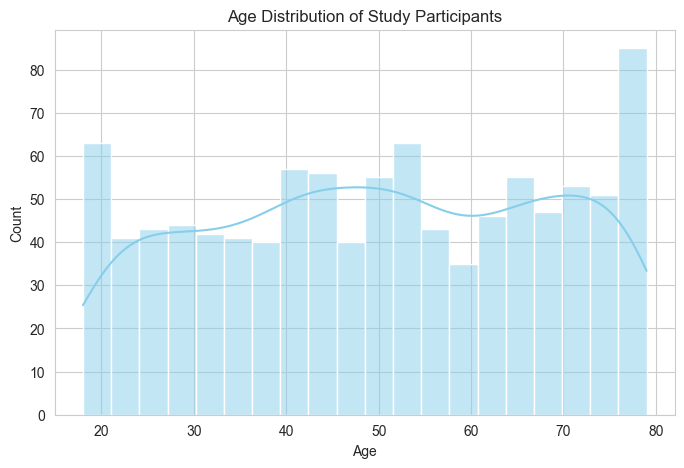

In [4]:
# Display distribution of age
plt.figure(figsize=(8, 5))
sns.histplot(metadata['age'].to_numpy(), bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Study Participants')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

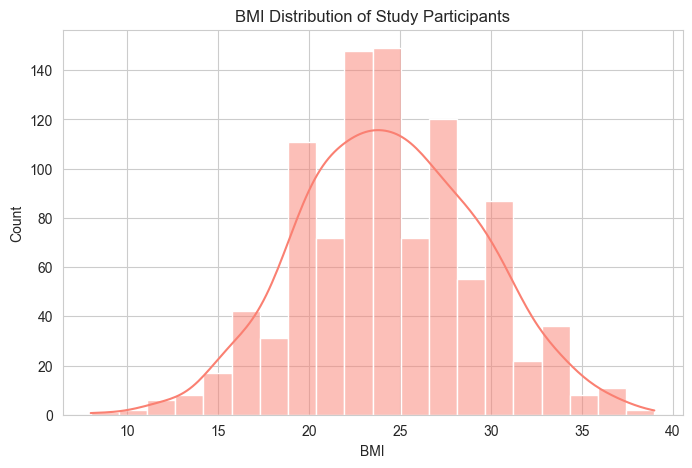

In [5]:
# display distribution of BMI
plt.figure(figsize=(8,5))
sns.histplot(metadata['bmi'].to_numpy(), bins=20, kde=True, color='salmon')
plt.title('BMI Distribution of Study Participants')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [6]:
# display unique values in categorical columns
categorical_cols = ['gender', 'country', 'sample_type', 'diet_type', 'coffee_consumption', 'antibiotics_past_year']
for col in categorical_cols:
    unique_values = metadata[col].unique().to_list()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'gender': ['female', 'male']
Unique values in 'country': ['UK', 'Canada', 'Australia', 'USA']
Unique values in 'sample_type': ['Stool']
Unique values in 'diet_type': ['Vegetarian', 'Omnivore', 'Vegan']
Unique values in 'coffee_consumption': ['none', 'occasional', 'daily']
Unique values in 'antibiotics_past_year': ['No', 'Yes']


/var/folders/bz/l_61zlvj34gcp1c8znmr81rr0000gn/T/ipykernel_48837/3794063351.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=metadata['gender'].to_numpy(), palette='pastel')


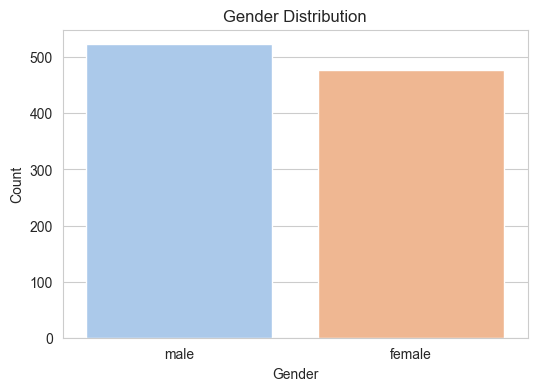

Number of male participants: 523
Number of female participants: 477


In [7]:
# display distribution of male vs female
plt.figure(figsize=(6,4))
sns.countplot(x=metadata['gender'].to_numpy(), palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

print("Number of male participants:", (metadata['gender'] == 'male').sum())
print("Number of female participants:", (metadata['gender'] == 'female').sum())


Country Distribution:
shape: (4, 2)
┌───────────┬───────┐
│ country   ┆ count │
│ ---       ┆ ---   │
│ str       ┆ u32   │
╞═══════════╪═══════╡
│ Canada    ┆ 254   │
│ UK        ┆ 242   │
│ USA       ┆ 261   │
│ Australia ┆ 243   │
└───────────┴───────┘


<BarContainer object of 4 artists>

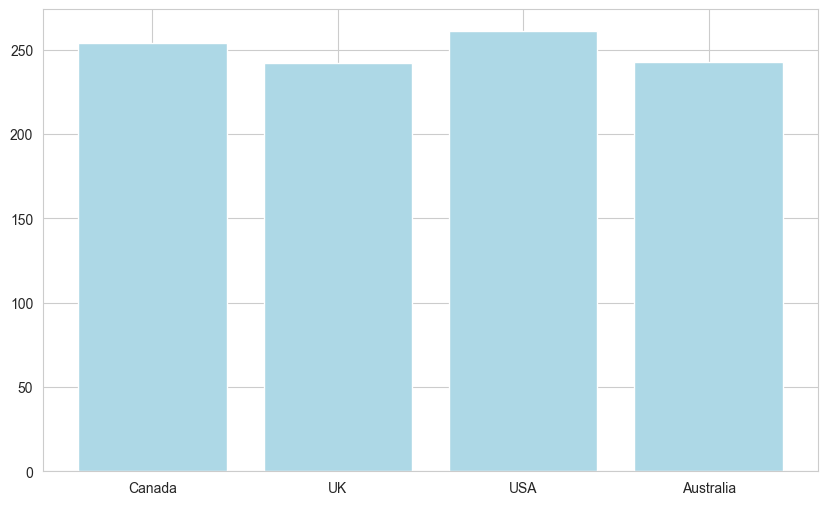

In [8]:
# bar chart showing distribution of countries
country_counts = metadata['country'].value_counts()

print("\nCountry Distribution:")
print(country_counts)
plt.bar(country_counts['country'].to_list(), country_counts['count'].to_list(), color='lightblue')

/var/folders/bz/l_61zlvj34gcp1c8znmr81rr0000gn/T/ipykernel_48837/2149559262.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diet_counts['diet_type'].to_list(), y=diet_counts['count'].to_list(), palette='muted')


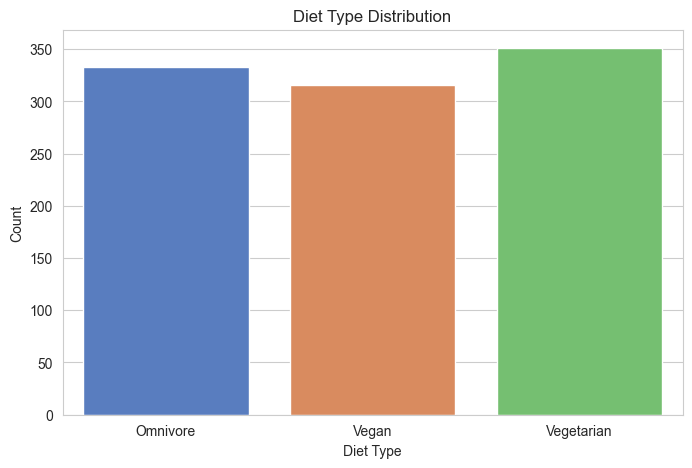

In [9]:
# plot distribution of diet types
diet_counts = metadata['diet_type'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=diet_counts['diet_type'].to_list(), y=diet_counts['count'].to_list(), palette='muted')
plt.title('Diet Type Distribution')
plt.xlabel('Diet Type')
plt.ylabel('Count')
plt.show()

/var/folders/bz/l_61zlvj34gcp1c8znmr81rr0000gn/T/ipykernel_48837/705036246.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coffee_counts['coffee_consumption'].to_list(), y=coffee_counts['count'].to_list(), palette='bright')


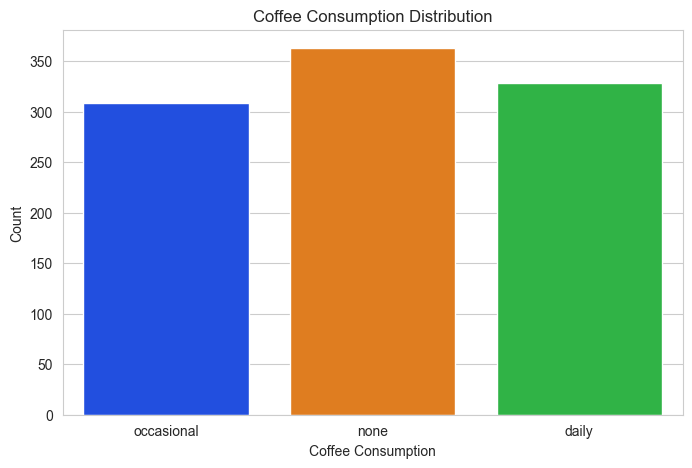

In [10]:
# plot distribution of coffee consumption
coffee_counts = metadata['coffee_consumption'].value_counts()
plt.figure(figsize=(8,5))
sns.barplot(x=coffee_counts['coffee_consumption'].to_list(), y=coffee_counts['count'].to_list(), palette='bright')
plt.title('Coffee Consumption Distribution')
plt.xlabel('Coffee Consumption')
plt.ylabel('Count')
plt.show()

/var/folders/bz/l_61zlvj34gcp1c8znmr81rr0000gn/T/ipykernel_48837/3242662037.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=antibiotics_counts['antibiotics_past_year'].to_list(), y=antibiotics_counts['count'].to_list(), palette='dark')


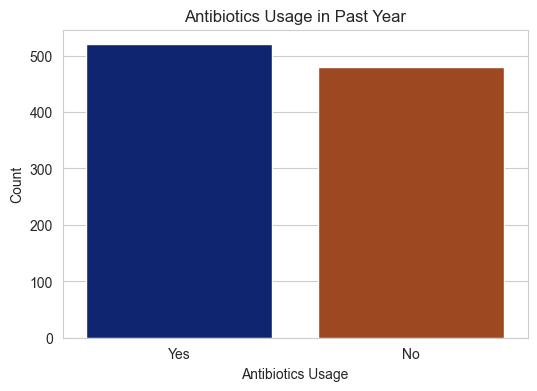

In [11]:
# plot distribution of antibiotics usage in past year
antibiotics_counts = metadata['antibiotics_past_year'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=antibiotics_counts['antibiotics_past_year'].to_list(), y=antibiotics_counts['count'].to_list(), palette='dark')
plt.title('Antibiotics Usage in Past Year')
plt.xlabel('Antibiotics Usage')
plt.ylabel('Count')
plt.show()

# Diet Type Breakdown

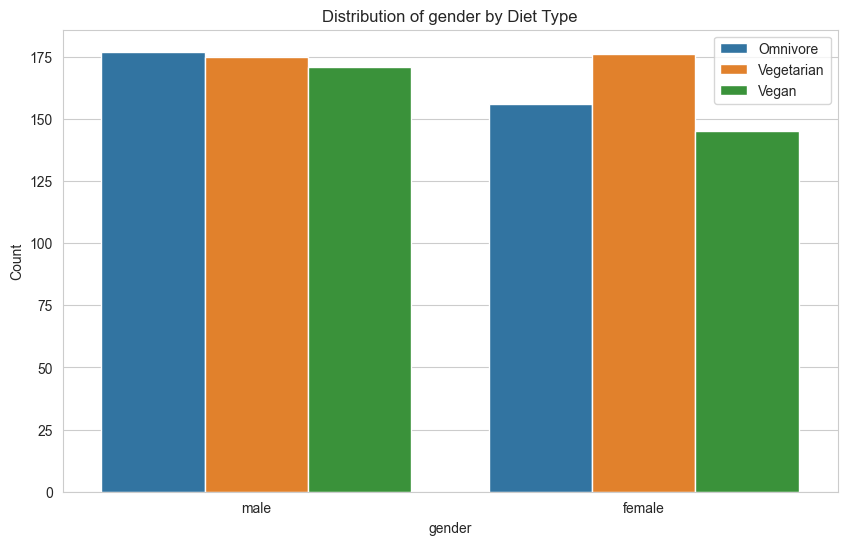

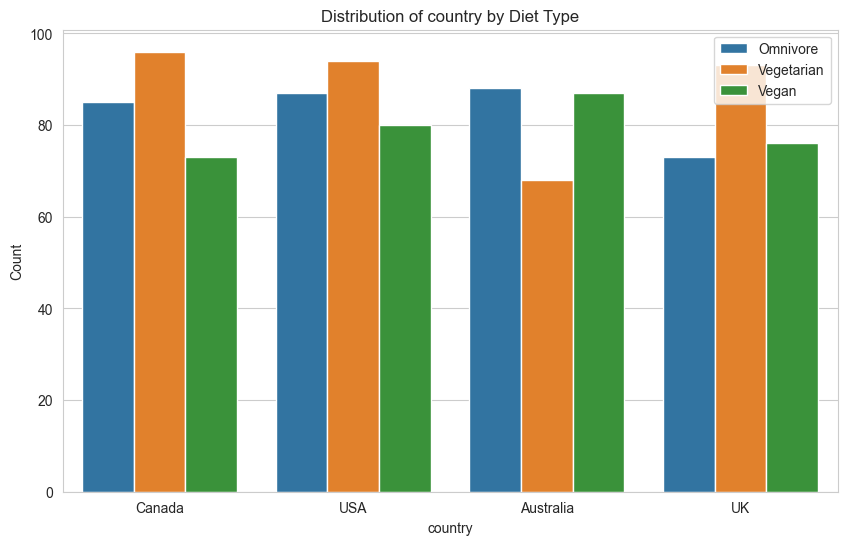

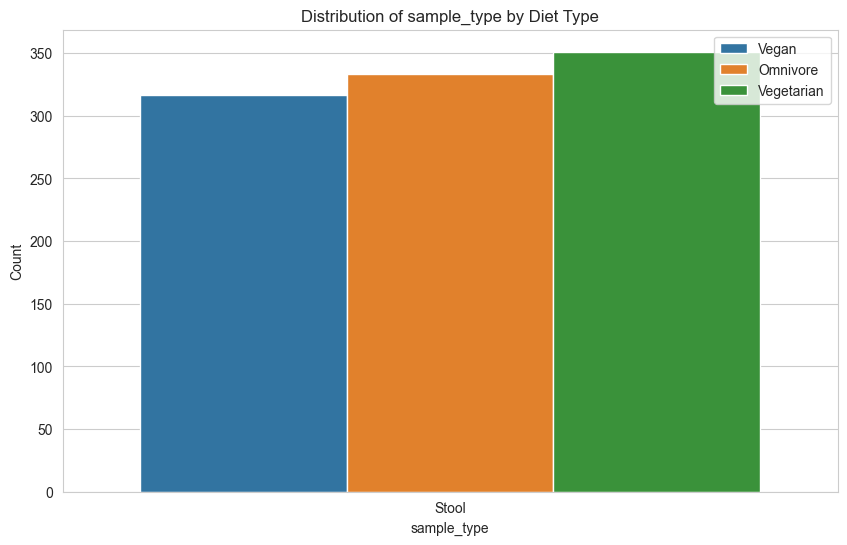

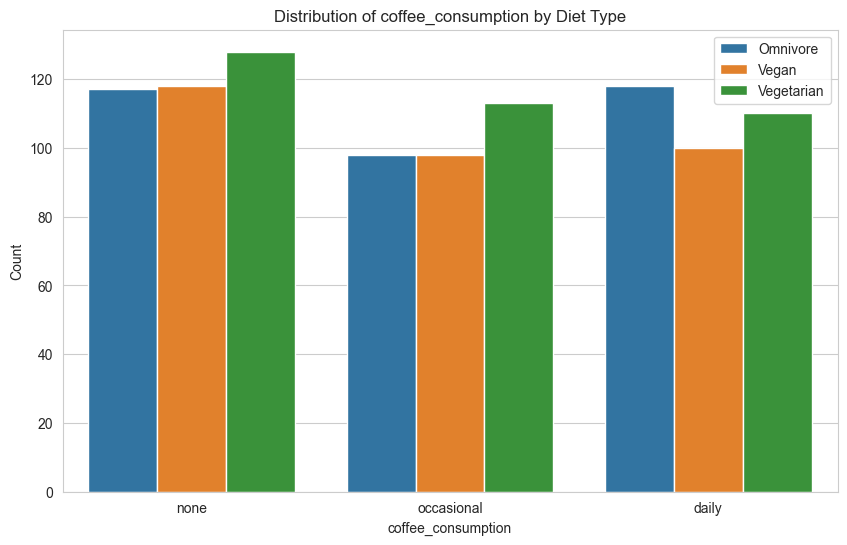

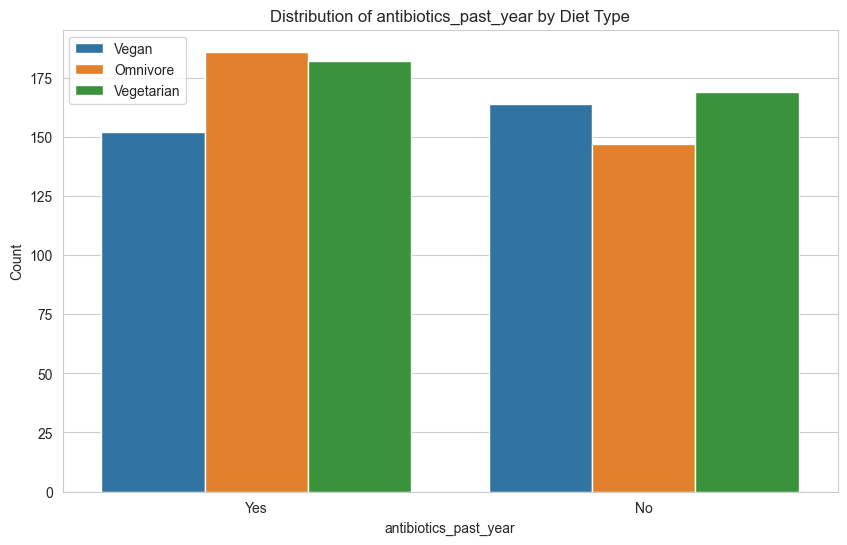

In [25]:
# loop through all categorical columns except diet_type
categorical_cols = ['gender', 'country', 'sample_type', 'coffee_consumption', 'antibiotics_past_year']
diet_types = metadata['diet_type'].unique().to_list()

for col in categorical_cols:
    # count occurrences of each category within each diet type
    category_counts = metadata.group_by([col, 'diet_type']).len()
    # bar plot showing distribution of the categorical column within each diet type
    plt.figure(figsize=(10,6))
    sns.barplot(x=category_counts[col].to_list(), y=category_counts['len'].to_list(), hue=category_counts['diet_type'].to_list())
    plt.title(f'Distribution of {col} by Diet Type')
    plt.xlabel(col)
    plt.ylabel('Count')


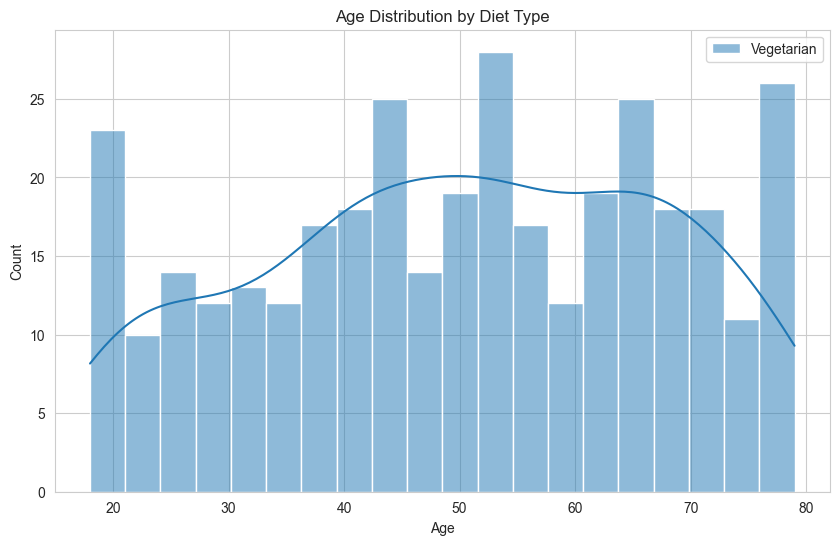

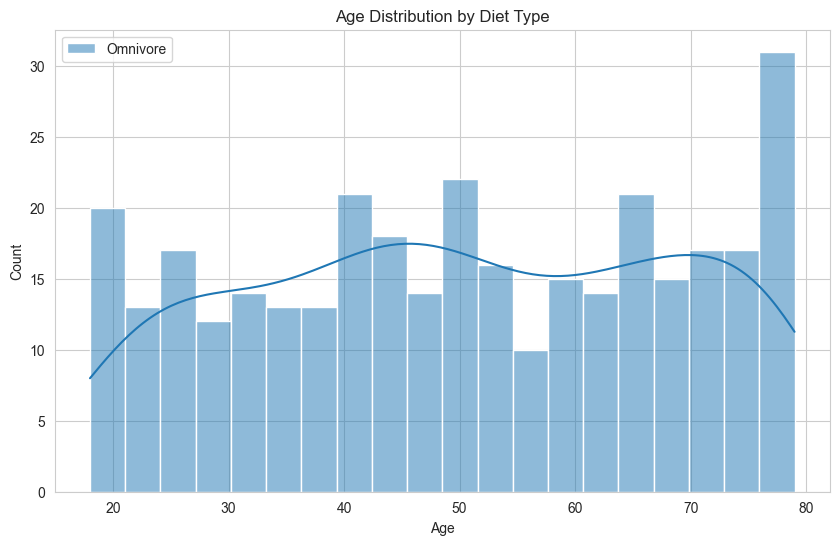

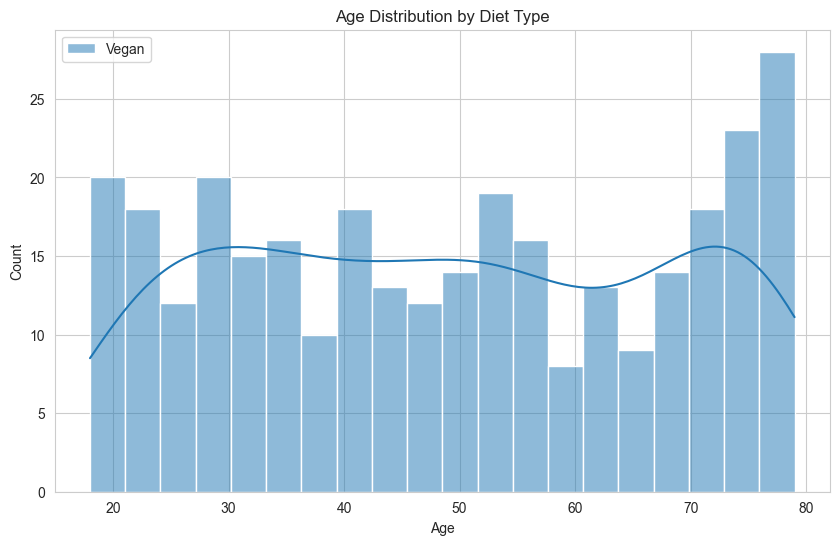

In [27]:
# display a histogram of age distribution per diet type
plt.figure(figsize=(10,6))
for diet in diet_types:
    subset = metadata.filter(pl.col('diet_type') == diet)
    sns.histplot(subset['age'].to_numpy(), bins=20, kde=True, label=diet, alpha=0.5)
    plt.title('Age Distribution by Diet Type')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

In [28]:
# compute average and std of age per diet type
age_stats = metadata.group_by('diet_type').agg([
    pl.col('age').mean().alias('average_age'),
    pl.col('age').std().alias('std_age')
])
print("\nAverage and Standard Deviation of Age per Diet Type:")
print(age_stats)


Average and Standard Deviation of Age per Diet Type:
shape: (3, 3)
┌────────────┬─────────────┬───────────┐
│ diet_type  ┆ average_age ┆ std_age   │
│ ---        ┆ ---         ┆ ---       │
│ str        ┆ f64         ┆ f64       │
╞════════════╪═════════════╪═══════════╡
│ Vegan      ┆ 49.231013   ┆ 18.845246 │
│ Vegetarian ┆ 50.14245    ┆ 17.32223  │
│ Omnivore   ┆ 50.15015    ┆ 18.262353 │
└────────────┴─────────────┴───────────┘


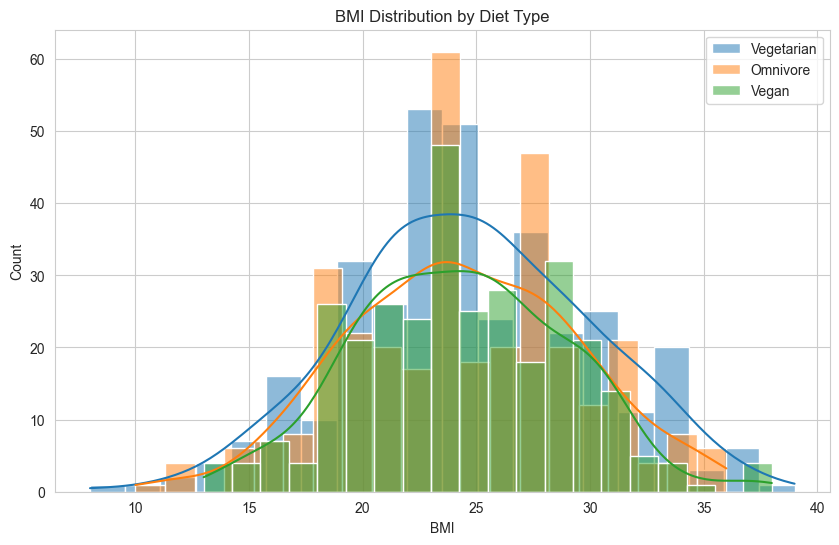

In [29]:
# show distribution of bmi per diet type
plt.figure(figsize=(10,6))
for diet in diet_types:
    subset = metadata.filter(pl.col('diet_type') == diet)
    sns.histplot(subset['bmi'].to_numpy(), bins=20, kde=True, label=diet, alpha=0.5)
plt.title('BMI Distribution by Diet Type')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend()
plt.show()

In [31]:
# compute avg, std, median of bmi per diet type
bmi_stats = metadata.group_by('diet_type').agg([
    pl.col('bmi').mean().alias('average_bmi'),
    pl.col('bmi').std().alias('std_bmi'),
    pl.col('bmi').median().alias('median_bmi')
])
print("\nAverage, Standard Deviation, and Median of BMI per Diet Type:")
print(bmi_stats)


Average, Standard Deviation, and Median of BMI per Diet Type:
shape: (3, 4)
┌────────────┬─────────────┬──────────┬────────────┐
│ diet_type  ┆ average_bmi ┆ std_bmi  ┆ median_bmi │
│ ---        ┆ ---         ┆ ---      ┆ ---        │
│ str        ┆ f64         ┆ f64      ┆ f64        │
╞════════════╪═════════════╪══════════╪════════════╡
│ Vegetarian ┆ 24.698006   ┆ 5.318429 ┆ 25.0       │
│ Vegan      ┆ 24.341772   ┆ 4.59022  ┆ 24.0       │
│ Omnivore   ┆ 24.363363   ┆ 4.974947 ┆ 24.0       │
└────────────┴─────────────┴──────────┴────────────┘


## Taxonomy EDA

In [ ]:
# display columns of taxonomy table
print("\nTAXONOMY TABLE COLUMNS")
print("=" * 30)
print(taxonomy.columns)


In [ ]:
# display head of taxonomy table
print("\nTAXONOMY OVERVIEW")
print("=" * 70)
print(f"\nFirst few rows:")
taxonomy.head()

OTU stands for 'operational taxonomic units'. In layman terms, OTUs are clusters of DNA sequences that resemble closely-related bacteria. OTUs are thus a way to measure diversity in a population of bacteria, such as the microbiome. 

Taxonomy refers to a classification system that identifies which microorganisms 

In [ ]:
# print size of taxonomy table
print(f"\nTaxonomy table size: {taxonomy.shape[0]} rows × {taxonomy.shape[1]} columns")

In [ ]:
# count taxonomy depths
taxonomy_depths = taxonomy['Taxonomy'].str.split(';').list.len()

# add taxonomy depths as a new column
taxonomy = taxonomy.with_columns(pl.Series(name='Taxonomy_Depth', values=taxonomy_depths))

# display new head 
print("\nTAXONOMY WITH DEPTH OVERVIEW")
print("=" * 70)
print(f"\nFirst few rows with Taxonomy Depth:")
taxonomy.head()

In [ ]:
# display distribution of taxonomy depths
plt.figure(figsize=(8,5))
sns.histplot(taxonomy['Taxonomy_Depth'].to_numpy(), bins=range(1, taxonomy['Taxonomy_Depth'].max()+2), kde=False, color='lightgreen')
plt.title('Distribution of Taxonomy Depths')
plt.xlabel('Taxonomy Depth')
plt.ylabel('Count')
plt.show()

# Taxonomy Structure Summary

## Key Finding: All Organisms Have Exactly 7 Taxonomic Ranks

| Rank | Prefix | Example | Explanation |
|------|--------|---------|-------------|
| 1 | Kingdom (k__) | Bacteria | All microbes in AGP are bacteria |
| 2 | Phylum (p__) | Firmicutes | Major bacterial division |
| 3 | Class (c__) | Clostridia | Subdivision of phylum |
| 4 | Order (o__) | Clostridiales | Subdivision of class |
| 5 | Family (f__) | Lachnospiraceae | Subdivision of order |
| 6 | Genus (g__) | Roseburia | Subdivision of family |
| 7 | Species (s__) | faecalis | Most specific classification |

## Why the Distribution Makes Sense

**All rows have exactly 7 tokens because:**
- The American Gut Project uses **16S rRNA gene sequencing**, which follows the standard **Linnaean taxonomy** system
- Every organism is classified at all 7 ranks (kingdom → species) without exception
- This is a fixed biological classification standard, not variable data
- Therefore, when splitting taxonomy by `;`, you always get exactly 7 tokens

In [ ]:
# create a column for rank 1 and append to taxonomy table

for rank_no in range(1, 8):
    taxonomy = taxonomy.with_columns(
        pl.col("Taxonomy").str.split(";").list.get(rank_no-1).alias("Rank_{}".format(rank_no))
    )

# remove Taxonomy column
taxonomy = taxonomy.drop("Taxonomy")

In [ ]:
taxonomy.head()

In [ ]:
# count unique taxa at each rank
for rank_no in range(1, 8):
    rank_col = "Rank_{}".format(rank_no)
    unique_count = taxonomy[rank_col].n_unique()
    print(f"Unique taxa at {rank_col}: {unique_count}")

# display as a table with xaxis as Rank and y axis as Unique Taxa Count
rank_names = ["Rank_1", "Rank_2", "Rank_3", "Rank_4", "Rank_5", "Rank_6", "Rank_7"]
unique_counts = [taxonomy[rank].n_unique() for rank in rank_names]
plt.figure(figsize=(10,6))
sns.barplot(x=rank_names, y=unique_counts, palette='viridis')
plt.title('Unique Taxa Count at Each Taxonomic Rank')
plt.xlabel('Taxonomic Rank')
plt.ylabel('Unique Taxa Count')
plt.show()